In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl

In [2]:
def stoc_eqs(INP,ts): 
    V = INP
    Rate=np.zeros((5))
    Change=np.zeros((5,4))
    N=np.sum(V[range(4)])
    Rate[0] = beta*V[0]*V[2]/N; Change[0,:]=([-1, +1, 0, 0]);
    Rate[1] = sigma*V[1];  Change[1,:]=([0, -1, +1, 0]);
    Rate[2] = gamma*V[2];  Change[2,:]=([0, 0,-1, +1]);

    Rate[4] = mort*V[2];  Change[4,:]=([0, 0, -1, 0]);
    R1=pl.rand();
    R2=pl.rand();
    ts = -np.log(R2)/(np.sum(Rate));
    m=min(pl.find(pl.cumsum(Rate)>=R1*pl.sum(Rate)));
    V[range(4)]=V[range(4)]+Change[m,:]
    return [V,ts]

In [3]:
def stoc_eqs(INP,ts): 
    V = INP
    Rate=np.zeros((22))
    Change=np.zeros((22,11))
    N=np.sum(V[range(11)])
    #HUMAN
    Rate[0]=(r/1e3)*beta[0,1]*V[8]; Change[0,:]=([-1,+1,0,0,0,0,0,0,0,0,0]);
    Rate[1]=sigma[0]*V[1]; Change[1,:]=([0,-1,+1,0,0,0,0,0,0,0,0]);
    Rate[2]=gamma[0]*V[2]; Change[2,:]=([0,0,-1,+1,0,0,0,0,0,0,0]);
    Rate[3]=delta[0]*V[3]; Change[3,:]=([+1,0,0,-1,0,0,0,0,0,0,0]);
    
    #MUTANT
    Rate[4]=(r/1e3)*beta[0,1]*V[8]; Change[4,:]=([0,0,0,0,-1,+1,0,0,0,0,0]);
    Rate[5]=sigma[0]*V[5]; Change[5,:]=([0,0,0,0,0,-1,+1,0,0,0,0]);
    Rate[6]=gamma[0]*V[6]; Change[6,:]=([0,0,0,0,0,0,-1,+1,0,0,0]);
    Rate[7]=delta[0]*V[7]; Change[7,:]=([0,0,0,0,+1,0,0,-1,0,0,0]);
    
    
    #MOSQUITO
    
    Rate[8]=(r/1e3)*beta[1,0]*V[2]; Change[8,:]=([0,0,0,0,0,0,0,0,-1,+1,0]);
    Rate[9]=(r/1e3)*beta[1,1]*V[6]; Change[9,:]=([0,0,0,0,0,0,0,0,-1,+1,0]);
    Rate[10]=sigma[1]*V[9]; Change[9,:]=([0,0,0,0,0,0,0,0,0,-1,+1]);
    
    #DEATH
    #HUMAN
    Rate[11]=d[0]*V[0]; Change[11,0]=0 #nothing happens;
    Rate[12]=d[0]*V[1]; Change[12,:]=([+1,-1,0,0,0,0,0,0,0,0,0]);
    Rate[13]=d[0]*V[2]; Change[13,:]=([+1,0,-1,0,0,0,0,0,0,0,0]);
    Rate[14]=d[0]*V[3]; Change[14,:]=([+1,0,0,-1,0,0,0,0,0,0,0]);
    
    #MUTANT    
    Rate[15]=d[0]*V[4]; Change[15,4]=0 #nothing happens;
    Rate[16]=d[0]*V[5]; Change[16,:]=([0,0,0,0,+1,-1,0,0,0,0,0]);
    Rate[17]=d[0]*V[6]; Change[17,:]=([0,0,0,0,+1,0,-1,0,0,0,0]);
    Rate[18]=d[0]*V[7]; Change[18,:]=([0,0,0,0,+1,0,0,-1,0,0,0]);
    
    #MOSQUITO
    Rate[19]=d[1]*V[8]; Change[19,8]=0; #nothing happens
    Rate[20]=d[1]*V[9]; Change[20,:]=([0,0,0,0,0,0,0,0,+1,-1,0]);
    Rate[21]=d[1]*V[10]; Change[21,:]=([0,0,0,0,0,0,0,0,+1,0,-1]);
    
    
    
    
    
    R1=pl.rand();
    R2=pl.rand();
    #print(R1)
    ts = -np.log(R2)/(np.sum(Rate));
    a=np.cumsum(Rate)>=R1*np.sum(Rate);
    #print(a)
    b=np.cumsum(Rate)
    #print(b)
    nn=np.where(np.cumsum(Rate)>=R1*np.sum(Rate))
    #print(nn)
    m=min(nn[0])
    #m=min(np.where(np.cumsum(Rate)>=R1*np.sum(Rate)));
    #print(m)
    V[range(11)]=V[range(11)]+Change[m,:]
    #print(V)
    return [V,ts]

In [106]:
def Stoch_Iteration(INPUT):
    lop=0
    ts=0
    T=[0]
    hS=[0]
    hE=[0]
    hI=[0]
    hR=[0]
    mS=[0]
    mE=[0]
    mI=[0]
    mR=[0]
    vS=[0]
    vE=[0]
    vI=[0]

    while T[lop] < ND:
        lop=lop+1
        T.append(T[lop-1]+ts)
        hS.append(INPUT[0])
        hE.append(INPUT[1])
        hI.append(INPUT[2])
        hR.append(INPUT[3])
        mS.append(INPUT[4])
        mE.append(INPUT[5])
        mI.append(INPUT[6])
        mR.append(INPUT[7])
        vS.append(INPUT[8])
        vE.append(INPUT[9])
        vI.append(INPUT[10])
        print(INPUT)
        [res,ts] = stoc_eqs(INPUT,ts)
        lop=lop+1
        T.append(T[lop-1])
        hS.append(INPUT[0])
        hE.append(INPUT[1])
        hI.append(INPUT[2])
        hR.append(INPUT[3])
        mS.append(INPUT[4])
        mE.append(INPUT[5])
        mI.append(INPUT[6])
        mR.append(INPUT[7])
        vS.append(INPUT[8])
        vE.append(INPUT[9])
        vI.append(INPUT[10])
        print(INPUT)
    return [T,hS,hE,hI,hR,mS,mE,mI,mR,vS,vE,vI]


In [19]:
def Stoch_Iteration(INPUT):
    lop=0
    ts=0
    T=[0]
    #T.append(T[lop-1]+ts)
    hS=[INPUT[0]]
    hE=[INPUT[1]]
    hI=[INPUT[2]]
    hR=[INPUT[3]]
    mS=[INPUT[4]]
    mE=[INPUT[5]]
    mI=[INPUT[6]]
    mR=[INPUT[7]]
    vS=[INPUT[8]]
    vE=[INPUT[9]]
    vI=[INPUT[10]]
    old=INPUT

    while T[lop] < ND:
        
        [res,ts] = stoc_eqs(old,ts)
        lop=lop+1
        T.append(T[lop-1]+ts)
        hS.append(res[0])
        hE.append(res[1])
        hI.append(res[2])
        hR.append(res[3])
        mS.append(res[4])
        mE.append(res[5])
        mI.append(res[6])
        mR.append(res[7])
        vS.append(res[8])
        vE.append(res[9])
        vI.append(res[10])
        res=old
    return [T,hS,hE,hI,hR,mS,mE,mI,mR,vS,vE,vI]


In [33]:
r=0.5
omega=1/14
d=np.array([5.5e-5, 0.1])
sigma=np.array([0.1,1/11])

gamma=np.array([1/270, 1/270])
delta=np.array([1/360,1/360])
beta=np.array([[0, 0.02], [0.5,0.2]]);

N0=1000
Mut=200
Mosq=10*N0

ND=MaxTime=2*365.0
#ND=MaxTime=1*365.0
INPUT=np.array((N0-Mut-1,0,1,0,Mut,0,0,0,Mosq-1,0,1))
timestep=0.0

In [34]:
[T,hS,hE,hI,hR,mS,mE,mI,mR,vS,vE,vI]=Stoch_Iteration(INPUT)

In [35]:
tT=np.array(T)[1:,]/365.
thS=np.array(hS)[1:,]
thE=np.array(hE)[1:,]
thI=np.array(hI)[1:,]
thR=np.array(hR)[1:,]
tmS=np.array(mS)[1:,]
tmE=np.array(mE)[1:,]
tmI=np.array(mI)[1:,]
tmR=np.array(mR)[1:,]
tvS=np.array(vS)[1:,]
tvE=np.array(vE)[1:,]
tvI=np.array(vI)[1:,]


/home/susanna/anaconda3/lib/python3.6/site-packages/IPython/core/pylabtools.py:121: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


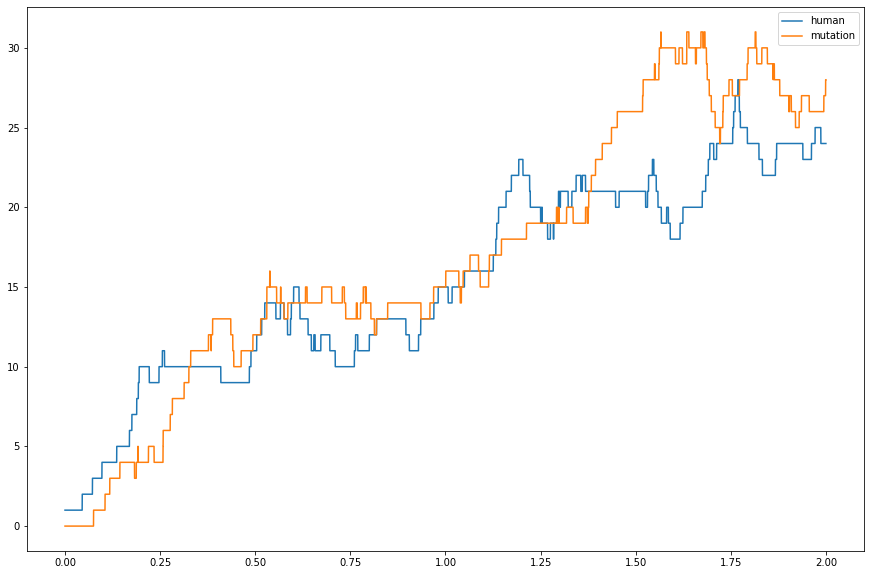

In [36]:
plt.figure(figsize=(15,10))
plt.plot(tT,thI,label="human")
plt.plot(tT,tmI, label="mutation")

plt.legend()
plt.show()

In [64]:
a=np.array((0,1,0,0,0))
aa=np.where(a==0)

In [65]:
aa[0]

array([0, 2, 3, 4])

In [ ]:


beta=1.0

gamma=1/10.0
sigma=1/12.0
mu=5e-4
N0=2618.0
mu_d=1/20
### You may want to try with popylation size of 50 (small) to see the events
### In this case uncomment the next line
#N0=50.0
ND=MaxTime=1*365.0
mort=334/2618
# X0=pl.floor(gamma*N0/beta)
# Y0=pl.ceil(mu*N0/gamma)
# Z0=N0-X0-Y0
W0=N0-1
X0=1
Y0=0
Z0=0
INPUT = np.array((W0,X0,Y0,Z0))

timestep=0.0

def stoc_eqs(INP,ts): 
	V = INP
	Rate=np.zeros((5))
	Change=np.zeros((5,4))
	N=np.sum(V[range(4)])
	Rate[0] = beta*V[0]*V[2]/N; Change[0,:]=([-1, +1, 0, 0]);
	Rate[1] = sigma*V[1];  Change[1,:]=([0, -1, +1, 0]);
	Rate[2] = gamma*V[2];  Change[2,:]=([0, 0,-1, +1]);
# 	Rate[3] = mu*N;  Change[3,:]=([+1, 0, 0, 0]);
# 	Rate[4] = mu*V[0];  Change[4,:]=([-1, 0, 0, 0]);
# 	Rate[5] = mu*V[1];  Change[5,:]=([0, -1, 0, 0]);
# 	Rate[6] = mu*V[2];  Change[6,:]=([0, 0, -1, 0]);
# 	Rate[7] = mu*V[3];  Change[7,:]=([0, 0, 0, -1]);
	Rate[4] = mort*V[2];  Change[4,:]=([0, 0, -1, 0]);
	R1=pl.rand();
	R2=pl.rand();
	ts = -np.log(R2)/(np.sum(Rate));
	m=min(pl.find(pl.cumsum(Rate)>=R1*pl.sum(Rate)));
	V[range(4)]=V[range(4)]+Change[m,:]
	return [V,ts]

def Stoch_Iteration(INPUT):
	lop=0
	ts=0
	T=[0]
	S=[0]
	E=[0]
	I=[0]
	R=[0]
	while T[lop] < ND:
		lop=lop+1
		T.append(T[lop-1]+ts)
		S.append(INPUT[0])
		E.append(INPUT[1])
		I.append(INPUT[2])
		R.append(INPUT[3])
		[res,ts] = stoc_eqs(INPUT,ts)
		lop=lop+1
		T.append(T[lop-1])
		S.append(INPUT[0])
		E.append(INPUT[1])
		I.append(INPUT[2])
		R.append(INPUT[3])
	return [T,S,E,I,R]

[T,S,E,I,R]=Stoch_Iteration(INPUT)

tT=np.array(T)[1:,]/365.
tS=np.array(S)[1:,]
tE=np.array(E)[1:,]
tI=np.array(I)[1:,]
tR=np.array(R)[1:,]
pl.figure(figsize=(15,10))
pl.subplot(411)
pl.plot(tT, tS, 'g')
#pl.xlabel ('Time (years)')
pl.ylabel ('Susceptible')
pl.subplot(412)
pl.plot(tT, tE, 'g')
#pl.xlabel ('Time (years)')
pl.ylabel ('Exposed')
pl.subplot(413)
pl.plot(tT, tI, 'r')
#pl.xlabel ('Time (years)')
pl.ylabel ('Infectious')
pl.subplot(414)
pl.plot(tT, tR, 'k')
pl.xlabel ('Time (years)')
pl.ylabel ('Recovered')
pl.show()